# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous distributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [60]:
from scipy.stats import uniform
x = uniform.rvs(size = 10)
a = 2
b = 3
randoms = a + (b-a) * x
print(randoms)

[2.0727173  2.91598447 2.97255445 2.60725359 2.63738727 2.39779954
 2.75252234 2.15727269 2.15087761 2.96670213]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

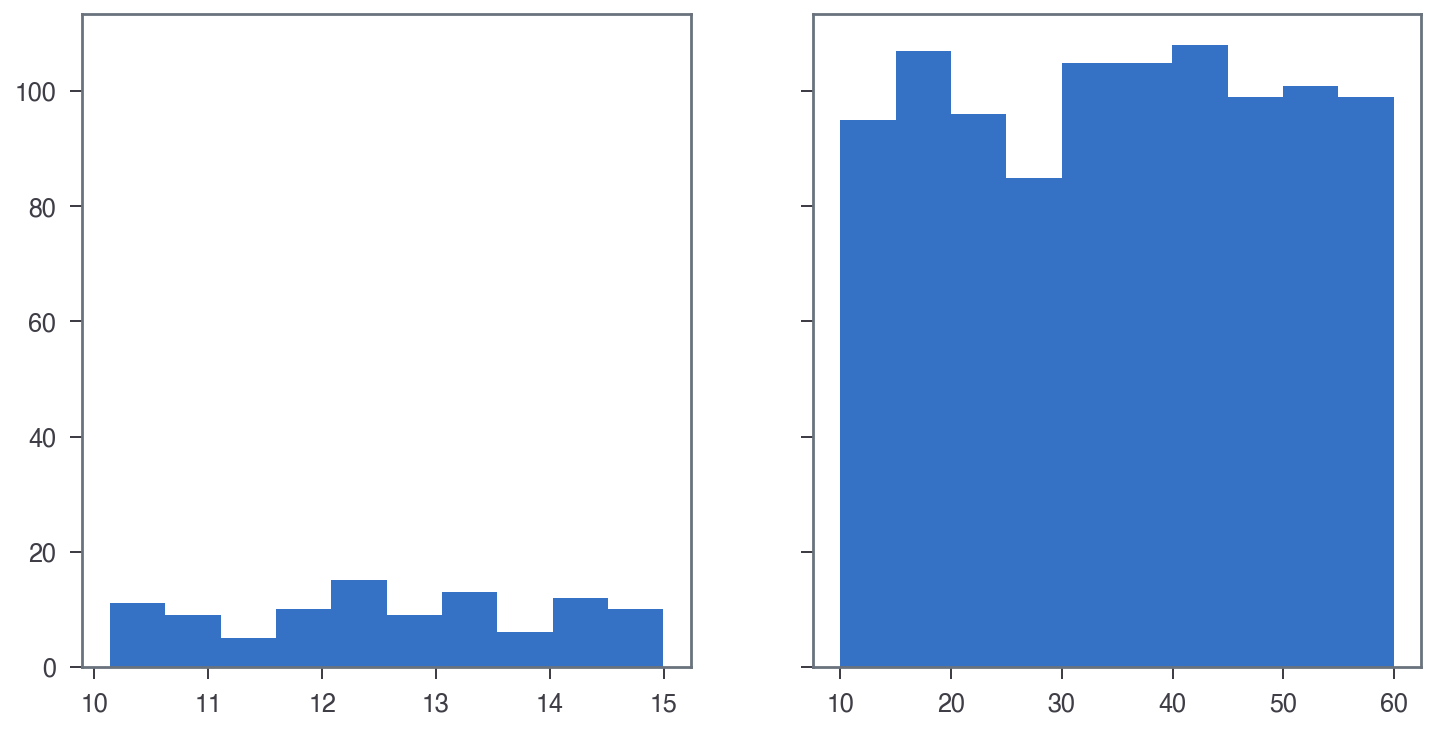

In [76]:
# your code here
def random_numbs(bottom, ceiling, count):
    x = uniform.rvs(size = count)
    a = bottom
    b = ceiling
    return a + (b-a) * x

fig, ax = plt.subplots(1,2, figsize = (12, 6), sharey = True)

ax[0].hist(x = random_numbs(10, 15, 100), bins = 10);
ax[1].hist(x = random_numbs(10, 60, 1000), bins = 10);

How are the two distributions different?

In [ ]:
# your answer here:
'''
Well, the range of the first distribution is significantly smaller, as it's only 100 vs 1000, so I
guess that's what's different?
'''

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

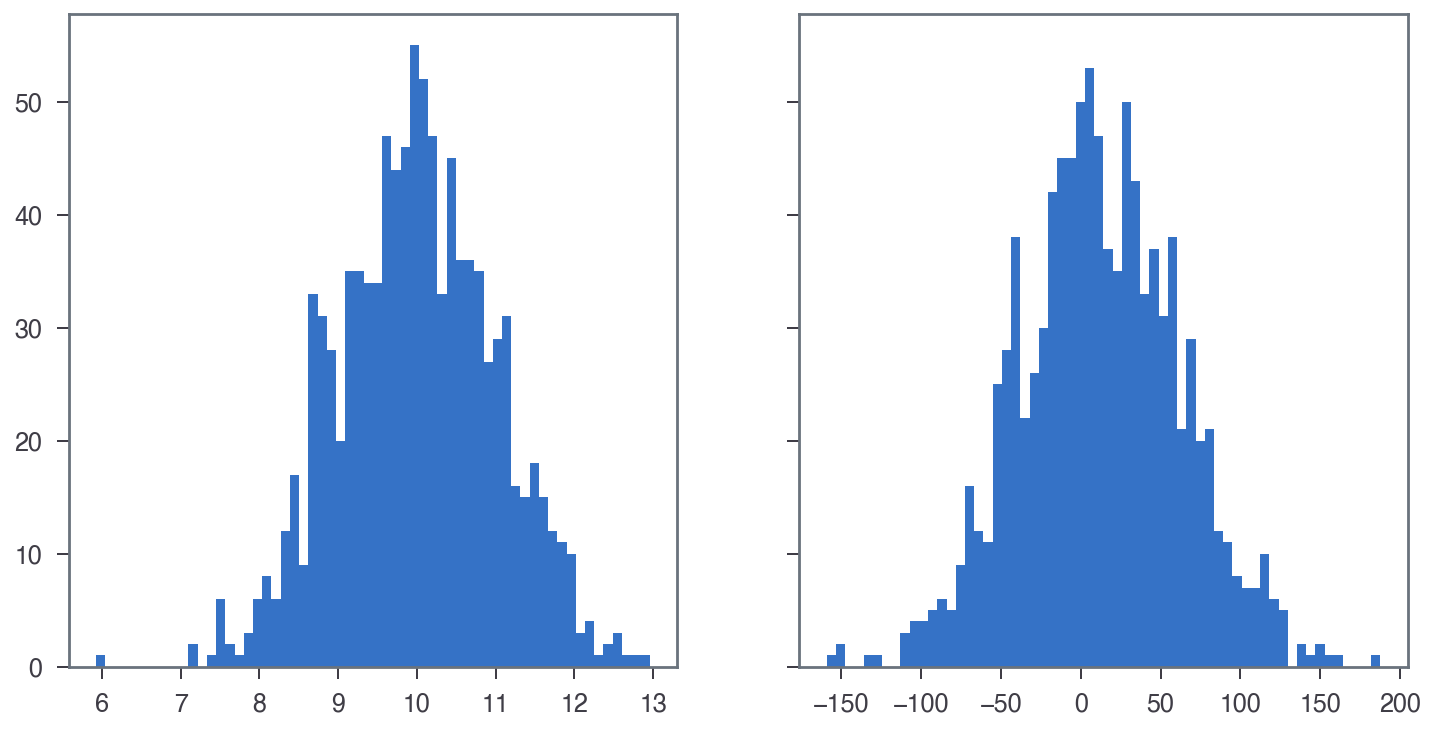

In [96]:
# your code here
from scipy.stats import norm

# Creating the function
def normal_dist(avg, std, count):
    return norm.rvs(loc = avg, scale = std, size = count)

# Creating the subplots
fig, ax = plt.subplots(1, 2, figsize = (12, 6), sharey = True)

# Plotting both histograms side by side
ax[0].hist(x = normal_dist(10, 1, 1000), bins = 60);
ax[1].hist(x = normal_dist(10, 50, 1000), bins = 60);

How are the two distributions different?

In [ ]:
# your answer here:
'''
Apart from the obvious difference in the x range caused by the different STD's, the first one seems 
more compact/compressed and the second one has a wider base and more tails, more kurtosis, I guess.
'''

## Normal Distribution of Real Data

In this challenge we are going to take a look into real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

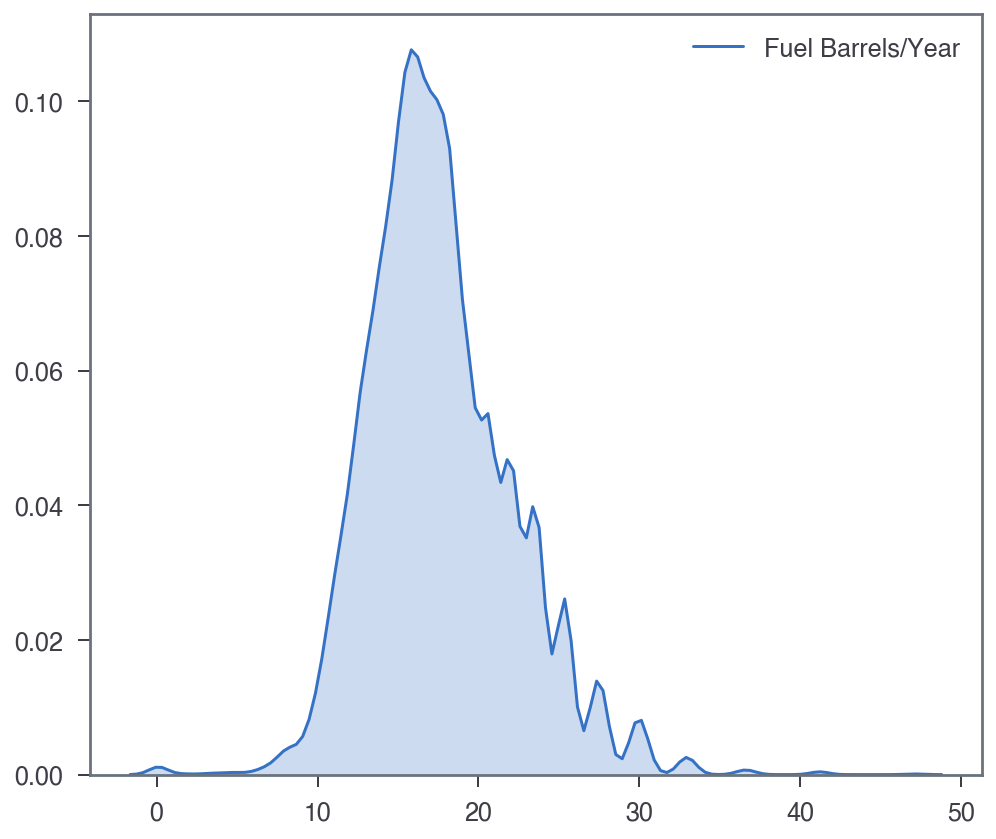

In [109]:
# your code here
import seaborn as sns

vehicles = pd.read_csv('/Users/mattymrc/Desktop/Ironhack/Datasets/vehicles.csv')

sns.kdeplot(vehicles['Fuel Barrels/Year'], shade = True);

2. CO2 Emission Grams/Mile 

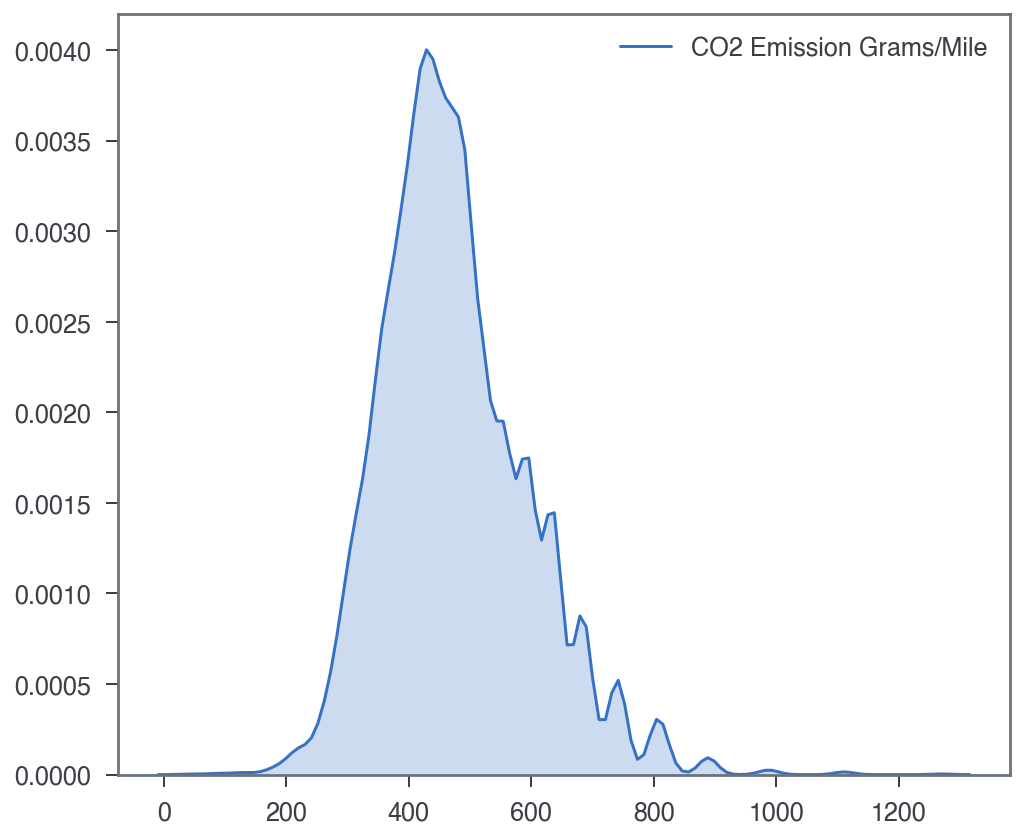

In [108]:
# your code here
sns.kdeplot(vehicles['CO2 Emission Grams/Mile'], shade = True);

3. Combined MPG

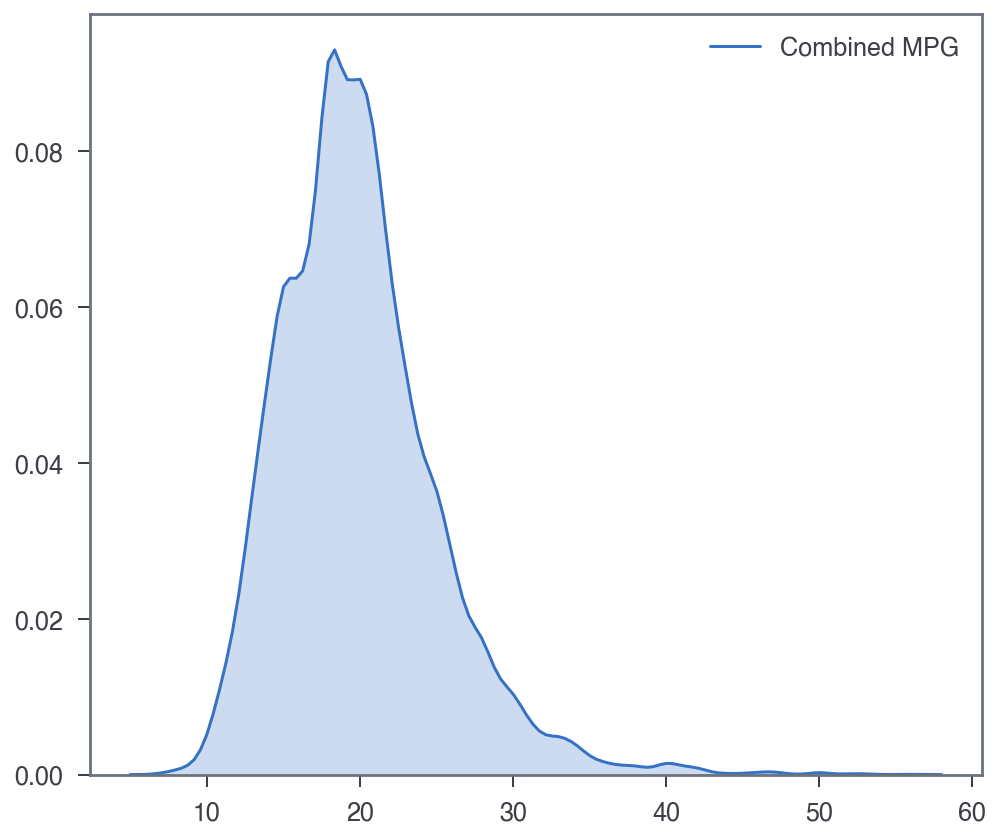

In [107]:
# your code here
sns.kdeplot(vehicles['Combined MPG'], shade = True);

Which one(s) of the variables are nearly normally distributed? How do you know?

In [ ]:
# you answer here:
'''
Initially I just had the pandas' histogram plot, but honestly, that wasn't that helpful for me to
visualize everything, so I just changed to seaborn.
Now it looks so much cleaner to see the shapes, and with that I suppose the best one, the closest 
to a normal distribution, would be the 'Combined MPG' plot, as it doesn't have all those ticks going
up on the right side like the other two.
'''

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with a mean of 1 and 100 and a size of 1000.

1. Plot the distributions as histograms with the number of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

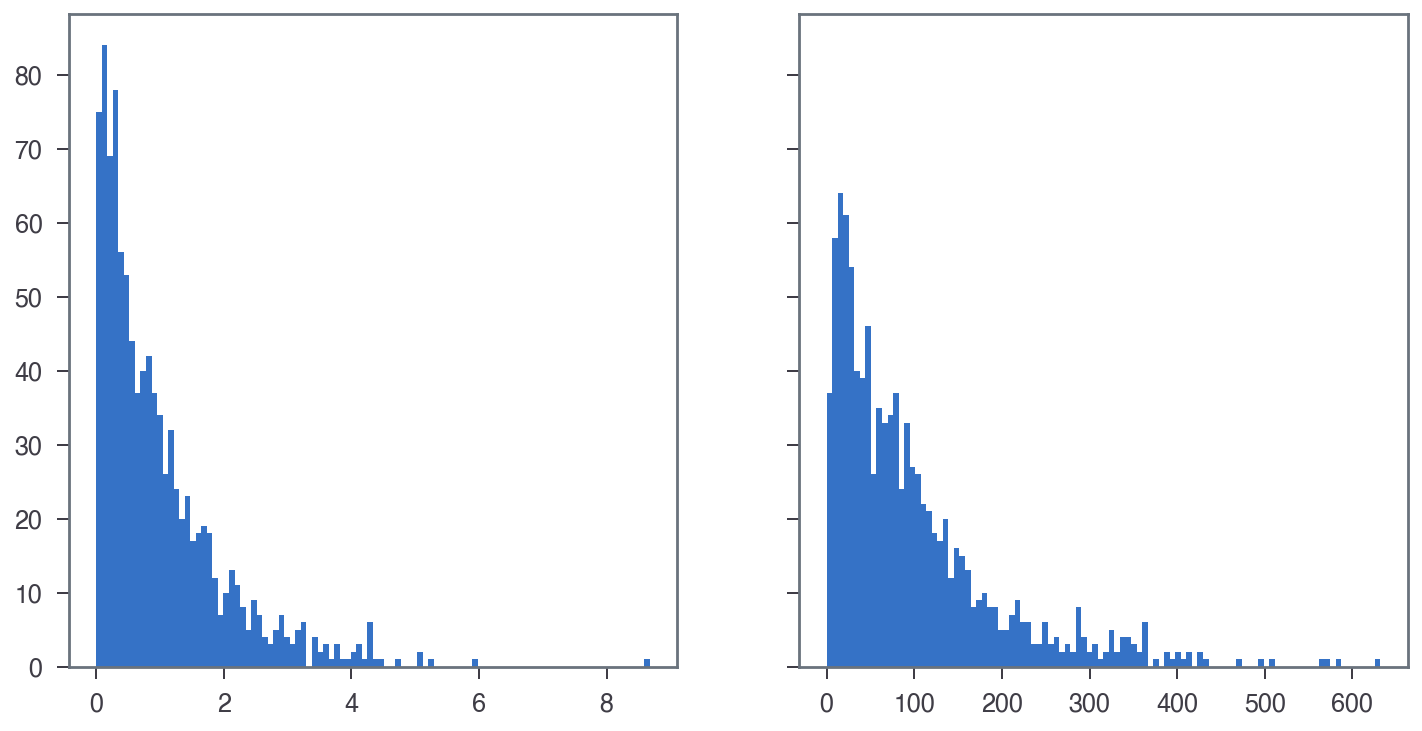

In [118]:
# your code here
def numpy_exp(avg, size):
    return np.random.exponential(avg, size)

# Creating the subplots
fig, ax = plt.subplots(1, 2, figsize = (12, 6), sharey = True)

# Creating the actual plots
ax[0].hist(x = numpy_exp(1, 1000), bins = 100);
ax[1].hist(x = numpy_exp(100, 1000), bins = 100);

How are the two distributions different?

In [ ]:
# your answer here:
'''
Well, it looks like the first plot is taller, and goes up higher in the y axis than the second one.
It also looks like the second plot has a wider right tail, whereas the first one is more compact.
'''

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [144]:
# your answer here
# Hint: This is the same as saying P(x<15)
from scipy.stats import expon

prob = expon.cdf(15, scale = 10)
print(prob)

0.7768698398515702


What is the probability that the customer will spend more than 15 minutes

In [145]:
# your answer here
1 - prob

0.2231301601484298